In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
control = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/control_group.csv', sep = ";")
test = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/test_group.csv', sep = ";")

In [4]:
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [6]:
control.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [7]:
control.columns = ["Campaign Name", "Date", "Amount Spent","Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart", "Purchases"]

In [8]:
test.columns = ["Campaign Name", "Date", "Amount Spent","Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart", "Purchases"]

In [9]:
control.describe()

,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [10]:
test.describe()

,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [11]:
control["Number of Impressions"].fillna(value=control["Number of Impressions"].mean(), inplace=True)
control["Reach"].fillna(value=control["Reach"].mean(), inplace=True)
control["Website Clicks"].fillna(value=control["Website Clicks"].mean(), inplace=True)
control["Searches Received"].fillna(value=control["Searches Received"].mean(), inplace=True)
control["Content Viewed"].fillna(value=control["Content Viewed"].mean(), inplace=True)
control["Added to Cart"].fillna(value=control["Added to Cart"].mean(), inplace=True)
control["Purchases"].fillna(value=control["Purchases"].mean(), inplace=True)

In [12]:
data = control.merge(test, how= 'outer').sort_values(['Date'])
data = data.reset_index(drop=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [13]:
data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [14]:
label = ["Searches from Control Campaign", 
         "Searches from Test Campaign"]
col = [sum(control["Searches Received"]), 
          sum(test["Searches Received"])]
fig2 = go.Figure(data=[go.Pie(labels=label, values=col)])
fig2.update_layout(title_text='Total Searches', title_font_size = 30, autosize=False, width=800, height=600)
fig2.update_traces(hoverinfo='value+label', textfont_size=30,
                  marker=dict(line=dict(color='black', width=2)))
fig2.show()

In [15]:
label = ["Site Clicks from Control Campaign", 
         "Site Clicks from Test Campaign"]
values = [sum(control["Website Clicks"]), 
          sum(test["Website Clicks"])]
colors = ['purple','orange']
fig3 = go.Figure(data=[go.Pie(labels=label, values=values)])
fig3.update_layout(title_text='Website Clicks', title_font_size = 30, autosize=False, width=800, height=600)
fig3.update_traces(hoverinfo='percent',textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=2)))
fig3.show()

In [16]:
label1 = ["Purchases from Control Campaign", 
         "Purchases from Test Campaign"]
values1 = [sum(control["Purchases"]), 
          sum(test["Purchases"])]
colors = ['black','green']
fig4 = go.Figure(data=[go.Pie(labels=label1, values=values1)])
fig4.update_layout(title_text='Purchases', title_font_size = 30, autosize=False, width=800, height=600)
fig4.update_traces(hoverinfo='value+label', textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=2)))
fig4.show()

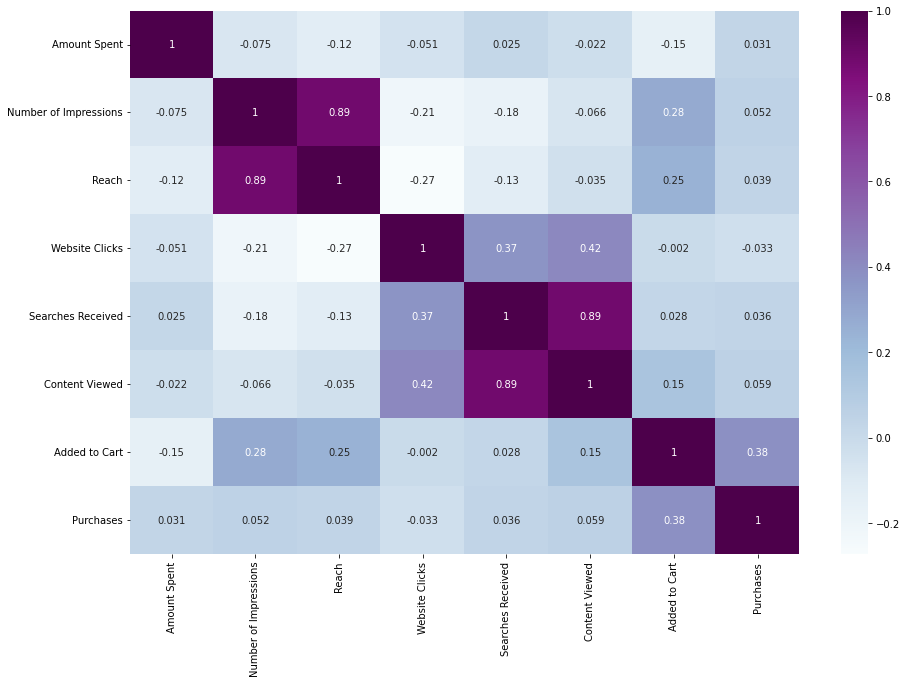

In [17]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(data.corr(), annot=True, cmap="BuPu")

In [18]:
fig = px.scatter(data_frame = data, 
                    x="Number of Impressions",
                    y="Amount Spent", 
                    size="Amount Spent", 
                    color= "Amount Spent", 
                    trendline="ols",
                  title= "Impressions and Spending", width=1200, height=600)
fig.update_layout(
    title_font_size=30,
)
fig.show()

In [19]:
fig = px.scatter(data_frame = data, 
                    x="Content Viewed",
                    y="Purchases", 
                    size="Website Clicks", 
                    color= "Purchases", 
                    trendline="ols",
                  title= "Purchases and Content Views", width=1200, height=600)
fig.update_layout(
    title_font_size=30,
)
fig.show()

In [20]:
fig = px.scatter(data_frame = data, 
                    x="Website Clicks",
                    y="Purchases", 
                    size="Website Clicks", 
                    color= "Purchases", 
                    trendline="ols",
                  title= "Clicks and Purchases", width=1200, height=600)
fig.update_layout(
    title_font_size=30,
)
fig.show()

In [21]:
fig = px.scatter(data_frame = data, 
                    x="Amount Spent",
                    y="Purchases", 
                    size="Amount Spent", 
                    color= "Purchases", 
                    trendline="ols",
                  title= "Spending and Purchases", width=1200, height=600)
fig.update_layout(
    title_font_size=30,
)

fig.show()

In [22]:
train, test = train_test_split(data, test_size= .25, random_state = 2)

In [23]:

x_train = train[["Amount Spent","Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart"]]
y_train = train[['Purchases']]

x_test = test[["Amount Spent","Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart"]]
y_test = test[['Purchases']]



In [24]:
model =LinearRegression()
model.fit(x_train, y_train)
model.predict(x_test)

pred = model.predict(x_test)
y_lin_pred = model.predict(x_test)

print('Score: %.3f' % model.score(x_train, y_train))
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_lin_pred))
print('R2 Score: %.3f' % r2_score(y_test, y_lin_pred))

Score: 0.174
Mean squared error: 29516.704
R2 Score: 0.065
